In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
import pandas as pd
import numpy as np
data=pd.read_csv('../input/train.csv')

In [3]:
data.head()

ID_code  target    var_0   var_1   ...     var_196  var_197  var_198  var_199
0  train_0       0   8.9255 -6.7863   ...      7.8784   8.5635  12.7803  -1.0914
1  train_1       0  11.5006 -4.1473   ...      8.1267   8.7889  18.3560   1.9518
2  train_2       0   8.6093 -2.7457   ...     -6.5213   8.2675  14.7222   0.3965
3  train_3       0  11.0604 -2.1518   ...     -2.9275  10.2922  17.9697  -8.9996
4  train_4       0   9.8369 -1.4834   ...      3.9267   9.5031  17.9974  -8.8104

[5 rows x 202 columns]

In [4]:
data.shape

(200000, 202)

In [5]:
data.describe()

target          var_0      ...              var_198        var_199
count  200000.000000  200000.000000      ...        200000.000000  200000.000000
mean        0.100490      10.679914      ...            15.870720      -3.326537
std         0.300653       3.040051      ...             3.010945      10.438015
min         0.000000       0.408400      ...             6.299300     -38.852800
25%         0.000000       8.453850      ...            13.829700     -11.208475
50%         0.000000      10.524750      ...            15.934050      -2.819550
75%         0.000000      12.758200      ...            18.064725       4.836800
max         1.000000      20.315000      ...            26.079100      28.500700

[8 rows x 201 columns]

In [6]:
data.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
          ..
var_170    0
var_171    0
var_172    0
var_173    0
var_174    0
var_175    0
var_176    0
var_177    0
var_178    0
var_179    0
var_180    0
var_181    0
var_182    0
var_183    0
var_184    0
var_185    0
var_186    0
var_187    0
var_188    0
var_189    0
var_190    0
var_191    0
var_192    0
var_193    0
var_194    0
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [7]:
data.info()
from matplotlib import *
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


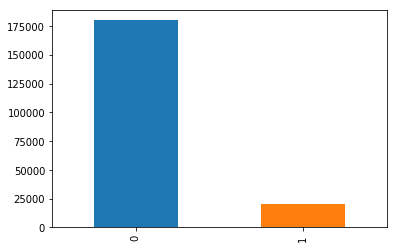

In [8]:
data.target.value_counts().plot(kind="bar")

In [9]:
#well ,we'll go with smote if we get less accuracy

In [10]:
data1=data.drop(["target","ID_code"],1)

In [11]:
#pca
data1.shape

(200000, 200)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200, svd_solver='full')

In [13]:
pca.fit(data1) # only features
print(pca.explained_variance_ratio_)

[7.13487235e-02 3.10216128e-02 2.75695999e-02 2.69115823e-02
 2.48956485e-02 2.28798854e-02 2.22509329e-02 2.10540339e-02
 2.08659274e-02 2.01754733e-02 1.84394179e-02 1.74373535e-02
 1.69942949e-02 1.68075998e-02 1.67481433e-02 1.35378272e-02
 1.31189907e-02 1.25176391e-02 1.23197742e-02 1.20732291e-02
 1.17257011e-02 1.16049503e-02 1.14618169e-02 1.13244364e-02
 1.12058448e-02 1.10347052e-02 1.07385844e-02 1.06791966e-02
 1.04511069e-02 1.04307641e-02 9.97411843e-03 9.89095593e-03
 9.83693457e-03 9.67727070e-03 9.61899875e-03 9.60881423e-03
 9.59017664e-03 9.47157967e-03 9.34340891e-03 9.18017657e-03
 9.02137073e-03 8.99917803e-03 8.79426755e-03 8.68902087e-03
 8.61316022e-03 8.54902155e-03 8.41111081e-03 7.91760769e-03
 7.02975459e-03 7.00603979e-03 6.03673044e-03 5.92779342e-03
 5.88667014e-03 5.71483097e-03 5.55848817e-03 5.54132685e-03
 5.48461390e-03 5.46027477e-03 5.42684629e-03 5.37070340e-03
 5.18439189e-03 5.06296857e-03 5.03266448e-03 4.97419095e-03
 4.82976791e-03 4.714889

In [14]:
#cummulative sum
pca.explained_variance_ratio_.cumsum()

array([0.07134872, 0.10237034, 0.12993994, 0.15685152, 0.18174717,
       0.20462705, 0.22687799, 0.24793202, 0.26879795, 0.28897342,
       0.30741284, 0.32485019, 0.34184449, 0.35865209, 0.37540023,
       0.38893806, 0.40205705, 0.41457469, 0.42689446, 0.43896769,
       0.45069339, 0.46229834, 0.47376016, 0.48508459, 0.49629044,
       0.50732514, 0.51806373, 0.52874293, 0.53919403, 0.5496248 ,
       0.55959891, 0.56948987, 0.57932681, 0.58900408, 0.59862307,
       0.60823189, 0.61782207, 0.62729365, 0.63663705, 0.64581723,
       0.6548386 , 0.66383778, 0.67263205, 0.68132107, 0.68993423,
       0.69848325, 0.70689436, 0.71481197, 0.72184172, 0.72884776,
       0.73488449, 0.74081229, 0.74669896, 0.75241379, 0.75797228,
       0.7635136 , 0.76899822, 0.77445849, 0.77988534, 0.78525604,
       0.79044043, 0.7955034 , 0.80053607, 0.80551026, 0.81034002,
       0.81505491, 0.81969157, 0.82431852, 0.82882037, 0.83313252,
       0.83743487, 0.84161275, 0.84576899, 0.84969728, 0.85356

In [15]:
test=pd.read_csv('../input/test.csv')

In [16]:
test.shape

(200000, 201)

In [17]:
test1=test.drop(labels="ID_code",axis=1)

In [18]:
#lets take n=150
pca = PCA(n_components=150)
pca_data=pca.fit(data1)
pca_data=pca.fit_transform(data1)
pca_test=pca.fit_transform(test1)

In [19]:
pc_data = pd.DataFrame(pca_data)
pc_test=pd.DataFrame(pca_test)

In [20]:
data1.head()

var_0   var_1    var_2   var_3   ...     var_196  var_197  var_198  var_199
0   8.9255 -6.7863  11.9081  5.0930   ...      7.8784   8.5635  12.7803  -1.0914
1  11.5006 -4.1473  13.8588  5.3890   ...      8.1267   8.7889  18.3560   1.9518
2   8.6093 -2.7457  12.0805  7.8928   ...     -6.5213   8.2675  14.7222   0.3965
3  11.0604 -2.1518   8.9522  7.1957   ...     -2.9275  10.2922  17.9697  -8.9996
4   9.8369 -1.4834  12.8746  6.6375   ...      3.9267   9.5031  17.9974  -8.8104

[5 rows x 200 columns]

In [21]:
pc_data.shape , pc_test.shape

((200000, 150), (200000, 150))

In [22]:
features=pc_data
label=data["target"]

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, make_scorer
from tqdm import tqdm
SEED = 1
model_full_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=SEED, n_jobs=-1)
model_full_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [25]:
model_full_rf.score(X_test, y_test)
#model_full_rf.score(X_train, y_train)

0.89965

In [26]:
#smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_sample(pc_data,data["target"])



Using TensorFlow backend.


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, make_scorer
from tqdm import tqdm
SEED = 1
model_full_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=SEED, n_jobs=-1)
model_full_rf.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [28]:
y_pred_rf = model_full_rf.predict(pc_test)

In [29]:
submission_rfc = pd.DataFrame({
        "ID_code": test["ID_code"],
        "target": y_pred_rf
    })
submission_rfc.to_csv('submission.csv', index=False)